<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/nefropat%C3%ADa_insuficiencia_renal_analisis_juan_cuevas_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Bio

     |████████████████████████████████| 271 kB 5.3 MB/s 
     |████████████████████████████████| 2.3 MB 38.8 MB/s 


In [ ]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [ ]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [ ]:
IR = SeqIO.read("/content/insu_renal.fasta", "fasta")

In [ ]:
AR_DNA= IR.seq
print( AR_DNA[:100])

ATGGTGTCCAAGCTCACGTCGCTCCAGCAAGAACTCCTGAGCGCCCTGCTGAGCTCCGGGGTCACCAAGGAGGTGCTGGTTCAGGCCTTGGAGGAGTTGC


In [ ]:
import pandas as pd

In [ ]:
#conteo de frecuencia de nucleotidos
DNA= AR_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)
print(nts)

{'A': 389, 'T': 263, 'G': 403, 'C': 541}
  nucleotides  frequency
1           T        263
0           A        389
2           G        403
3           C        541


In [ ]:
AR_DNA= IR.seq

#Transcrpcion DNA a RNA 
ar_mRNA = AR_DNA.transcribe()
print(ar_mRNA[:100])

AUGGUGUCCAAGCUCACGUCGCUCCAGCAAGAACUCCUGAGCGCCCUGCUGAGCUCCGGGGUCACCAAGGAGGUGCUGGUUCAGGCCUUGGAGGAGUUGC


In [ ]:
#traduccion de arn mensajero a aminoacidos 
ar_aa = ar_mRNA.translate()
print(ar_aa[:99])

MVSKLTSLQQELLSALLSSGVTKEVLVQALEELLPSPNFGVKLETLPLSPGSGAEPDTKPVFHTLTNGHAKGRLSGDEGSEDGDDYDTPPILKELQALN


In [ ]:
print(f"Insuficiencia renal (nefropatía) genoma tiene una longitud de {len(ar_aa)} aminoacidos")

Insuficiencia renal (nefropatía) genoma tiene una longitud de 532 aminoacidos


In [ ]:
proteinas = ar_aa.split('*')
proteinas[:100]

[Seq('MVSKLTSLQQELLSALLSSGVTKEVLVQALEELLPSPNFGVKLETLPLSPGSGA...QAW'), Seq('')]

In [ ]:
#recuento de aminoacidos
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
ar_protein = SeqIO.read("/content/insu_renal.fasta","fasta")

In [ ]:
ar_analysed = ProteinAnalysis(str(ar_protein))

In [ ]:
print(ar_analysed)

In [ ]:
ar_analysed.count_amino_acids()

{'A': 12,
 'C': 24,
 'D': 5,
 'E': 0,
 'F': 1,
 'G': 15,
 'H': 1,
 'I': 1,
 'K': 0,
 'L': 0,
 'M': 3,
 'N': 10,
 'P': 4,
 'Q': 0,
 'R': 0,
 'S': 4,
 'T': 11,
 'V': 0,
 'W': 0,
 'Y': 0}

In [ ]:
from collections import Counter

In [ ]:
ar_freq = Counter(ar_protein)

In [ ]:
ar_freq

Counter({'A': 389, 'C': 541, 'G': 403, 'T': 263})

In [ ]:
Counter(ar_protein).most_common(10)
#Aminoácido más común en NEFROPATIA

[('C', 541), ('G', 403), ('A', 389), ('T', 263)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

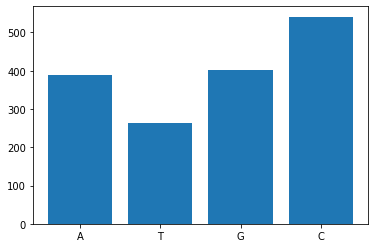

In [ ]:
plt.bar(ar_freq.keys(), ar_freq.values())
#grafico de aminoacidos de NEFROPATIA

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
ar_protein = SeqIO.read("/content/insu_renal.fasta","fasta")

In [ ]:
ar_protein

SeqRecord(seq=Seq('ATGGTGTCCAAGCTCACGTCGCTCCAGCAAGAACTCCTGAGCGCCCTGCTGAGC...TGA'), id='lcl|NM_001165923.4_cds_NP_001159395.1_1', name='lcl|NM_001165923.4_cds_NP_001159395.1_1', description='lcl|NM_001165923.4_cds_NP_001159395.1_1 [gene=HNF1B] [db_xref=CCDS:CCDS58538.1] [protein=hepatocyte nuclear factor 1-beta isoform 2] [protein_id=NP_001159395.1] [location=176..1771] [gbkey=CDS]', dbxrefs=[])

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
alignments = pairwise2.align.globalxx(ar_protein,ar_protein)

In [ ]:
print(alignments)

[Alignment(seqA="ID: lcl|NM_001165923.4_cds_NP_001159395.1_1\nName: lcl|NM_001165923.4_cds_NP_001159395.1_1\nDescription: lcl|NM_001165923.4_cds_NP_001159395.1_1 [gene=HNF1B] [db_xref=CCDS:CCDS58538.1] [protein=hepatocyte nuclear factor 1-beta isoform 2] [protein_id=NP_001159395.1] [location=176..1771] [gbkey=CDS]\nNumber of features: 0\nSeq('ATGGTGTCCAAGCTCACGTCGCTCCAGCAAGAACTCCTGAGCGCCCTGCTGAGC...TGA')", seqB="ID: lcl|NM_001165923.4_cds_NP_001159395.1_1\nName: lcl|NM_001165923.4_cds_NP_001159395.1_1\nDescription: lcl|NM_001165923.4_cds_NP_001159395.1_1 [gene=HNF1B] [db_xref=CCDS:CCDS58538.1] [protein=hepatocyte nuclear factor 1-beta isoform 2] [protein_id=NP_001159395.1] [location=176..1771] [gbkey=CDS]\nNumber of features: 0\nSeq('ATGGTGTCCAAGCTCACGTCGCTCCAGCAAGAACTCCTGAGCGCCCTGCTGAGC...TGA')", score=386.0, start=0, end=386)]


In [ ]:
print(format_alignment(*alignments[0]))

ID: lcl|NM_001165923.4_cds_NP_001159395.1_1
Name: lcl|NM_001165923.4_cds_NP_001159395.1_1
Description: lcl|NM_001165923.4_cds_NP_001159395.1_1 [gene=HNF1B] [db_xref=CCDS:CCDS58538.1] [protein=hepatocyte nuclear factor 1-beta isoform 2] [protein_id=NP_001159395.1] [location=176..1771] [gbkey=CDS]
Number of features: 0
Seq('ATGGTGTCCAAGCTCACGTCGCTCCAGCAAGAACTCCTGAGCGCCCTGCTGAGC...TGA')
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
ID: lcl|NM_001165923.4_cds_NP_001159395.1_1
Name: lcl|NM_001165923.4_cds_NP_001159395.1_1
Description: lcl|NM_001165923.4_cds_NP_001159395.1_1 [gene=HNF1B] [db_xref=CCDS:CCDS58538.1] [protein=hepatocyte nuclear factor 1-beta i

**La nefropatía HNF1b es una enfermedad renal de origen genético. Las mutaciones en el gen HNF1b se transmiten de forma autosómica domi- nante, lo que significa que los descendientes de un miembro afectado tienen un 50% de probabilidad de heredar la enfermedad.
NEFROLOGÍA. Vol. XXIII. Suplemento 4. 2003 Variación genética y progresión de la insuficiencia renal P. González, R. Álvarez, V. Álvarez y E. Coto Laboratorio de Genética Molecular. Instituto de Investigación Nefrológica (IRSIN). Hospital Central de Asturias. Oviedo. Denominamos insuficiencia renal (IR) a la pérdida de las funciones del riñón como consecuencia de la reducción lenta y progresiva de la filtración glomerular. Entre las causas más frecuentes de insuficiencia renal se encuentran la nefropatía diabética, la nefrosclerosis debida a la hipertensión y la glomerulonefritis crónica. Desde una perspectiva genética las enfermedades que conducen a la IR se pueden dividir en dos grandes grupos. Por un lado tenemos aquellas que muestran un patrón de herencia mendeliano clásico, tanto dominante (como sería el caso de la poliquistosis renal dominante del adulto, PRDA), como recesivo (enfermedades como la nefronoptisis o la poliquistosis hereditaria recesiva). Todas estas enfermedades son monogénicas, es decir, se deben a mutaciones en uno sólo de nuestros aproximadamente 40 mil genes. Por otro lado tenemos aquellas patologías en las que el patrón de herencia no es mendeliano, bien porque intervienen varios genes o porque los factores ambientales desempeñan un papel fundamental en su origen y progresión. Estas patologías, entre las que se hallan la hipertensión o la diabetes, son mucho más frecuentes que las hereditarias puras. Al confluir factores ambientales y genéticos, debemos asumir que la IR engloba varias enfermedades de origen y evolución muy compleja. Como consecuencia de esta complejidad estamos aún lejos de entender las bases genético-moleculares de estas enfermedades, por lo que actualmente es muy difícil hacer predicciones sobre el curso de la enfermedad o la respuesta a los tratamientos. Esta situación puede extenderse también a las enfermedades hereditarias, para las cuales la evolución puede verse condicionada por otros genes o por factores ambientales, como la dieta. GENES, POLIMORFISMOS Y GENOTIPOS Casi todas las enfermedades humanas tienen componentes genéticos y ambientales. En unos casos, una alteración o mutación en un solo gen es necesaria y suficiente para producir la enfermedad. Estos casos son fáciles de identificar porque la enfermedad afecta a varios miembros de una familia, habiendo heredado todos los pacientes una copia mutada de un gen (herencia dominante) o las dos copias mutadas (herencia recesiva). En estos casos la mutación en el gen implicado tiene como consecuencia un cambio drástico en la estructura de la proteína codificada por dicho gen (por ejemplo, por introducción de un codón de parada prematuro o un cambio de un aminoácido por otro de naturaleza diferente), o que no se produzca la proteína (caso de las deleciones). Estas mutaciones se deben a errores en la replicación del ADN durante la formación de los gametos, y algunas pueden haber surgido muchas generaciones atrás, extendiéndose por todo el planeta generación tras generación. El genoma humano es una secuencia de unos 3 mil millones de nucleótidos (A, C, G, T), y en nuestros 23 pares de cromosomas habría unos 40 mil genes. Una de cada 1.000 posiciones en la secuencia es polimórfica, es decir, hay cromosomas con un nucleótido u otro. Definir todas las posiciones variables o polimórficas de nuestro genoma es uno de los objetivos de la investigación postgenómica. Para cada uno de estos polimorfismos hay tres posibles genotipos, los dos homocigotos y el heterocigoto, y el genotipo de cada uno de nosotros quedó establecido en el momento en que fuimos fecundados. De toda la variación genética nos interesa aquella que afecta a la función o a la expresión de la proteína. Es decir, aquellos polimorfismos que determinen cambios de aminoácido en la proteína codificada por el gen o que, si se localizan en el promotor (secuencia que controla la expresión del gen), puedan asociarse a diferencias en la cantidad de ARN y de proteína sintetizados por la célula. Dos individuos que difieran en sus genotipos para uno de estos polimorfismos podrían diferir en su sus- Correspondencia: Dr. Eliecer Coto García Genética Molecular Hospital Central de Asturias 33006 Oviedo E-mail: ecoto@hcas.insalud.es 36 VARIACIÓN GENÉTICA Y PROGRESIÓN DE LA INSUFICIENCIA RENAL Selección de sujetos Grupo 1 Grupo 2 ¿CÓMO INVESTIGAR EL PAPEL DE LOS POLIMORFISMOS GENÉTICOS EN LA ENFERMEDAD RENAL? Como hemos señalado anteriormente, los estudios dirigidos a definir el papel de cualquier polimorfismo genético en el origen o la progresión de las enfermedades renales son del tipo casos-controles (o adaptaciones de los mismos). En estos casos se requiere una correcta selección de los pacientes y controles: edad y sexo similares, obtenidos de la misma población, y bajo los mismos factores ambientales de riesgo. En el caso de que comparemos grupos de pacientes, además de las consideraciones anteriores debemos asumir que todos tienen la misma patología y que la enfermedad se ha manifestado a edad similar. El no cumplimiento de cualquiera de estas condiciones podría invalidar los resultados, haciendo difícil su comparación con los obtenidos por otros investigadores. Como ejemplo práctico citaremos aquí un reciente trabajo de Zanchi y cols. sobre el papel de la variación en el gen de la óxido nítrico sintasa endotelial (eNOS) en la progresión hacia la nefropatía diabética en los pacientes con diabetes tipo 1 (IDDM) 1 . Estos autores seleccionaron tres grupos de pacientes con IDDM: 78 con nefropatía avanzada, 74 con proteinuria pero valores normales de creatinina sérica y 195 con normoalbuminuria pese a ser diabéticos durante al menos 15 años (grupo control). Obtuvieron ADN y determinaron el genotipo de cada paciente para un polimorfismo en el promotor de la eNOS (-786 T/C). Por estudios recientes sabemos que este polimorfismo condiciona los niveles de expresión de la enzima en determinadas situaciones de estrés celular. Así, los cromosomas con C en la posición ­786 responderían a la hipoxia sintetizando menos ARN y proteína que los cromosomas con T 2. Siendo la enzima eNOS fundamental para la síntesis del óxido nítrico, comparados con los individuos de genotipo TT los CC podrían tener un peor pronóstico en situaciones de estrés vascular o renal. De acuerdo con algunos estudios recientes el genotipo CC incrementaría significativamente el riesgo de sufrir espasmo coronario e infarto de miocardio entre los fumadores 2,3. Con relación a la nefropatía diabética, Zanchi y cols. hallaron una frecuencia de homocigotos CC del 10% en los controles (IDDM con normoalbuminuria), del 15% en los pacientes con proteinuria, y del 24% entre los que tenían nefropatía avanzada. Es decir, entre los pacientes IDDM tener un genotipo CC incrementaría el riesgo de desarrollar nefropatía (OR = 2,8; 95% intervalo confianza = 1,4 ­ 2,6; CC vs TC/TT) 1. 37 Extracción de sangre y obtención de ADN Extracción de sangre y obtención de ADN Genotipar (PCR, secuenciación) Genotipar (PCR, secuenciación) Comparación estadística de frecuencias (obtención de la significación estadística, p; cálculo de la odds ratio e intervalos de confianza) Fig. 1.--Esquema de un estudio de asociación genética para un polimorfismo. Los grupos a comparar (grupo 1 y 2) pueden ser: pacientes y controles, enfermos con progresión rápida y lenta, enfermos con buena y mala respuesta a un tratamiento, etc. ceptibilidad a desarrollar determinadas enfermedades. Con todo es fundamental entender que, a diferencia de los cambios genéticos asociados a las enfermedades hereditarias, estos polimorfismos no son condición necesaria ni suficiente para desarrollar enfermedades. Es decir, una persona con un genotipo que confiere cierto riesgo de desarrollar hipertensión podría no padecerla, y una persona con el genotipo alternativo podría sufrir la enfermedad. Para descubrir qué variación genética contribuye al origen de una enfermedad se aplican estudios del tipo casos-controles, en los que un grupo de pacientes y controles son genotipados y las frecuencias comparadas. Si no hay diferencia entre las frecuencias de los genotipos podemos concluir que esa variación genética no contribuye al origen de la enfermedad. Si hay diferencias significativas podremos cuantificar cuál es el riesgo de padecer la enfermedad asociado al genotipo que sea más frecuente entre los pacientes. Una estrategia similar se aplicaría a la identificación de polimorfismos que contribuyan a la progresión de una enfermedad, comparando en este caso progresores rápidos y lentos. Se puede incluso investigar el papel de la variación genética en la respuesta a un fármaco, genotipando pacientes con buena y mala respuesta y comparando las frecuencias. Este es el ámbito de actuación de lo que se conoce como Farmacogenética. P. GONZÁLEZ y cols. El ejemplo anterior podría extenderse a los polimorfismos de otros muchos genes. Obviamente, esos polimorfismos corresponderían a genes que codifican proteínas que desempeñan un papel importante en la fisiología del riñón o del endotelio vascular. Como el número de genes candidatos (y las proteínas que codifican) puede ser muy elevado, no debe extrañarnos que puedan ser muchos (incluso centenares) los polimorfismos asociados a una enfermedad. En conjunto, el riesgo genético de un individuo vendría definido por el conjunto de las posiciones variables del genoma, y para definirlo deberíamos analizar muchos polimorfismos. Actualmente esto no es posible, limitándose los análisis a estudiar unos pocos genes que, como el caso de la eNOS, juegan o podrían jugar un papel relevante en el origen o progresión de la enfermedad renal. Por su relevancia en la fisiopatología vascular y renal, en esta revisión nos hemos centrado, además de en la eNOS, en los genes del sistema de la angiotensina. EL SISTEMA RENINA-ANGIOTENSINA Y LA PROGRESIÓN DE LA INSUFICIENCIA RENAL El sistema renina-angiotensina (SRA) está claramente implicado en la progresión de la enfermedad renal. Se han descrito polimorfismos en los genes que codifican las proteínas que componen el SRA, y alguno de ellos podría estar relacionado con las diferencias en la evolución clínica entre los pacientes con la misma patología. El caso más conocido es el del polimorfismo I/D en el gen de la enzima convertidora de la angiotensina (ECA). Este polimorfismo correlaciona fuertemente con los niveles circulantes de la ECA 4, 5, y estaría implicado en diversas enfermedades cardiovasculares, como la aterosclerosis 6, las cardiomiopatías dilatada e hipertrófica 7, 8, el infarto de miocardio 9, 10, o la hipertrofia del ventrículo izquierdo 11, 12. En todos los casos, el peor pronóstico corresponde al genotipo DD, que es el que determina los niveles más altos de ECA en la sangre. En cuanto a la enfermedad renal, este genotipo podría ser también un factor de riesgo para la progresión de la nefropatía diabética 13 o la poliquistosis renal del adulto 14. EL GEN DE LA ECA EN LA POLIQUISTOSIS RENAL DOMINANTE DEL ADULTO Como señalamos anteriormente, la PRDA es una enfermedad hereditaria monogénica 15, cuyo origen reside en la presencia de mutaciones en determinados genes (PKD1 y PKD2), pero cuya velocidad de 38 progresión hacia el fallo renal se vería influida por factores ambientales y genéticos, que actuarían como modificadores de la progresión. Son varios los estudios que demuestran el papel que el SRA juega en esta enfermedad 16-18. Mientras que no se encuentra una implicación de polimorfismos en otros genes de dicho sistema (M235T del angiotensinógeno, A1166C del receptor tipo 1 de la angiotensina II), podría existir una asociación entre el polimorfismo I/D de la ECA y las diferencias en la progresión hacia el fallo renal de los pacientes poliquísticos, alcanzando aquellos individuos homocigotos DD el fallo renal a una edad más temprana 14. EL GEN DE LA ECA Y LA NEFROPATÍA DIABÉTICA La nefropatía diabética es una enfermedad glomerular que tiene su origen, fundamentalmente, en un mal control de la diabetes. El hecho de que no todos los enfermos diabéticos la desarrollan hace pensar en la presencia de factores genéticos que confieran mayor riesgo a unos individuos que a otros 19. Uno de estos factores podría ser el polimorfismo I/D de la ECA, teniendo los pacientes con genotipo DD un peor pronóstico 20-22. Sin embargo, esta asociación con la nefropatía diabética no ha sido confirmada por otros autores 23-26. En un estudio multicéntrico, Marre y cols. sugerían que el polimorfismo I/D de la ECA contribuiría tanto a la susceptibilidad de padecer la enfermedad como en la progresión hacia el fallo renal en los pacientes con nefropatía diabética 27. EL GEN DE LA ECA EN LA NEFROPATÍA IgA La nefropatía IgA es una de las glomerulonefritis más comunes, variando la progresión hacia el fallo renal entre los pacientes. Algunos factores que contribuyen a definir la progresión son la hipertensión, el grado de proteinuria y el daño tisular (constatado mediante biopsia) 28. Los análisis de la relación entre el polimorfismo I/D de la ECA y esta nefropatía, incluyendo un estudio multicéntrico reciente, sugieren un peor pronóstico entre los pacientes con genotipo DD 29-34. OTROS POLIMORFISMOS DEL SISTEMA RENINAANGIOTENSINA Si bien el polimorfismo I/D de la ECA ha sido el más estudiado, también se ha analizado el papel de otros, como el A1166C del receptor tipo 1 de la an- VARIACIÓN GENÉTICA Y PROGRESIÓN DE LA INSUFICIENCIA RENAL giotensina II y el M235T del angiotensinógeno, en el origen y la progresión de las enfermedades renales. La mayoría de estos estudios sugieren una ausencia de relación entre estos polimorfismos y las enfermedades renales 22, 27, 34 . LA ÓXIDO NÍTRICO SINTASA ENDOTELIAL (eNOS) Y LAS ENFERMEDADES RENALES La óxido nítrico sintasa endotelial (eNOS) es la enzima encargada de producir óxido nítrico en el endotelio, por lo que la variación en este gen puede tener como consecuencia la existencia de diferencias interindividuales en la capacidad para sintetizar esta molécula, como indicamos anteriormente para el polimorfismo ­786 T/C. Los polimorfismos de la eNOS podrían estar relacionados con la disfunción endotelial, frecuente en los pacientes con diabetes tipo 1 35, 36, y podría contribuir al desarrollo de nefropatía diabética en estos pacientes 37, 38. GENES PROINFLAMATORIOS Y ENFERMEDAD RENAL La infiltración de monocitos/macrófagos y células T en el riñón juega un papel importante en la progresión hacia la insuficiencia renal crónica 39. Durante este proceso inflamatorio se produce una interrelación entre diversas moléculas, como citoquinas, quimiocinas y sus respectivos receptores ubicados en las células renales. Las moléculas inflamatorias (interleukina-1, TNF-alfa, etc.) inducen la expresión de las quimiocinas, que poseen la capacidad de provocar la migración de distintos tipos celulares, y de moléculas de adhesión que permiten la infiltración de monocitos y células T. Todas las células renales tienen capacidad para producir quimiocinas, cuyos niveles están alterados de forma característica en cada enfermedad 40-44. Quimiocinas y citoquinas están codificadas por genes polimórficos, y esta variación genética puede influir en la expresión del gen y la cantidad de proteína sintetizada 45, 46. Por tanto, el genotipo de cada individuo para estos polimorfismos podría condicionar la aparición o la progresión de la insuficiencia renal. Así, se han investigado los polimorfismos de la interleuquina-1 en la progresión hacia la nefropatía diabética, con resultados contradictorios 47, 48. Una variante en el gen TGF-beta1 ha sido asociada al riesgo de desarrollar nefropatía diabética 49, y los polimorfismos en la IL1RN y el TNF-alpha pueden afectar a la susceptibilidad y severidad de la nefropatía IgA 50. Recientemente, un polimorfismo en el CCR5, que codifica el receptor para un tipo de quimiocinas proinflamatorias, ha sido relacionado con la supervivencia del trasplante renal 51. VARIACIÓN GENÉTICA Y RESPUESTA A LOS FÁRMACOS: FARMACOGENÉTICA Los pacientes responden de formas diferentes a los tratamientos, y esta variación en la respuesta clínica a un fármaco tiene su origen tanto en factores ambientales como genéticos. La farmacogenética estudia el papel de los polimorfismos genéticos en la respuesta al tratamiento con un fármaco determinado. En relación con las enfermedades renales varios estudios sugieren que la respuesta a los inhibidores de la ECA es peor entre aquellos pacientes con un genotipo DD 52, 53. Así, al ser tratados con captropil, los pacientes hipertensos con nefropatía diabética y con genotipo homocigoto ECA-II presentan una mayor reducción de la albuminuria y la presión sanguínea, comparados con los pacientes con genotipo DD13. Por otro lado, en otro estudio con otro inhibidor de la ECA (Ramipril) en pacientes con nefropatías no diabéticas la reducción de la proteinuria y el filtrado glomerular es más efectiva en pacientes con genotipo DD 54. La optimización de los tratamientos farmacológicos mediante los análisis genéticos de cada paciente tendría un enorme impacto sobre la práctica médica, razón por la que la farmacogenética ha levantado grandes expectativas socioeconómicas. AGRADECIMIENTOS Pelayo González es becario predoctoral de la FICYT. La investigación del Laboratorio de Genética Molecular es financiada mediante proyectos del FIS y la FICYT. BIBLIOGRAFÍA 1. Zanchi A, Moczulski DK, Hanna LS, Wantman M, Warram JH, Krolewski AS: Risk of advanced diabetic nephropathy in type 1 diabetes is associated with endothelial nitric oxide synthase gene polymorphism. Kidney Int 57: 405-413, 2000. 2. Nakayama M, Yasue H, Yoshimura M, Shimasaki Y, Kugiyama K, Ogawa H, Motoyama T, Saito Y, Ogawa Y, Miyamoto Y, Nakao K. T ­786 > C mutation in the 5´-flanking region of the endothelial nitric oxide synthase gene is associated with coronary spasm. Circulation 99: 2864-2870, 1999. 3. Álvarez R, González P, Batalla A, Reguero JR, Iglesias-Cubero G, Hevia S, Cortina A, Merino E, González I, Álvarez V, Coto E: Association between the NOS3 (-786 T/C) and the ACE (I/D) DNA genotypes and early coronary artery disease. Nitric Oxide: Biol Chem 5: 343-348, 2001. 39 P. GONZÁLEZ y cols. 4. Rigat B, Hubert C, Alhenc-Gelas F, Cambien F, Corvol P, Soubrier F: An insertion/deletion polymorphism in the angiotensin I converting gene accounting for half the variance of serum enzyme levels. J Clin Invest 86: 1343-1346, 1990. 5. Tiret L, Rigat B, Visvikis S, Breda C, Corvol P, Cambien F, Soubrier F: Evidence from combined segregation and linkage analysis that a variant of the angiotensin I converting enzyme (ACE) controls plasma ACE. Am J Hum Genet 51: 197205, 1992. 6. Hibi K, Ishigami T, Kimura K, Nakao M, Iwamoto T, Tamura K, Nemoto T, Shimizu T, Mochida Y, Ochiai H, Umemura S, Ishii M: Angiotensin-converting enzyme gene polymorphism adds risk for the severity of coronary atheroscerosis in smokers. Hypertension 30(2): 574-579, 1997. 7. Raynolds MV, Bristow MR, Bush EW, Abraham WT, Lowes BD, Zisman LS, Taft CS, Perryman MB: Angiotensin-converting enzyme DD genotype in patients with ischaemic or idiopathic dilated cardiomyopathy. Lancet 342(8879): 1073-1075, 1993. 8. Marian AJ, Yu QT, Workman R, Greve G, Roberts R: Angiotensin-converting enzyme polymorphism in hypertrophic cardiomyopathy and sudden cardiac death. Lancet 342: 10851086, 1993. 9. Cambien F, Pirier O, Lecerf L, Evans A, Cambou P, Arveiler D, Luc G, Bard JM, Bara L, Ricard S, Tiret L, Amouyel P, Alhenc-Gelas F, Soubrier F: Deletion polymorphism in the gene for angiotensin-converting enzyme is a potent risk factor for myocardial infarction. Nature 359: 641-644, 1992. 10. Álvarez R, Reguero JR, Batalla A, Iglesias-Cubero G, Cortina A, Álvarez V, Coto E: Angiotensin-converting enzyme and angiotensinogen II receptor 1 polymorphisms: association with early coronary disease. Cardiovasc Res 40: 375-379, 1998. 11. Schunkert H, Hense HW, Holmer SR, Stender M, Perz S, Keil U, Lorell BH, Riegger GAJ: Association between a deletion polymorphism of the angiotensin-converting-enzyme gene and left ventricular hypertrophy. N Engl J Med 330: 16341638, 1994. 12. Iwai N, Ohmichi N, Nakamura Y, Kinoshita M: DD genotype of the angiotensin-converting enzyme gene is a risk factor for left ventricular hypertrophy. Circulation 90: 26222628, 1994. 13. Jacobsen P, Rossing K, Rossing P, Tarnow L, Mallet C, Poirier O, Cambien F, Parving HH: Angiotensin converting enzyme gene polymorphism and ACE inhibition in diabetic nephropathy. Kidney Int 53: 1002-1006, 1998. 14. Baboolal K, Ravine D, Daniels J, Williams N, Holmans P, Coles GA, Williams JD: Association of the angiotensin I converting enzyme gene deletion polymorphism with early onset of ESRF in PKD1 adult polycystic kidney disease. Kidney Int 52(3): 607-613, 1997. 15. Bennett WM: Clinical features of autosomal dominant polycystic kidney disease. Kidney Int 42 (Supl. 42): S74-S79, 1993. 16. Chapman AB, Johnson A, Gabow PA, Schrier RW: The reninangiotensin system and autosomal polycystic kidney disease. N Engl J Med 323: 1091-1096, 1990. 17. Gabow PA, Johnson AM, Kaeheny WD: Factors affecting the progression of renal disease in autosomal dominant polycycstic kidney disease. Kidney Int 41: 1311-1319, 1992. 18. Watson ML, MacNicol AM, Allan PL, Wright AF: Effects of angiotensin converting enzyme inhibition in adult polycystic kidney disease. Kidney Int 41: 206-210, 1992. 19. Krolewski AJ, Warram JH, Rand LI, Kahn CR: Epidemiologic approach to the etiology of type I diabetes mellitus and its complications. N Engl J Med 317: 1390-1398, 1987. 20. Marre M, Bernadet P, Gallois Y, Savagner F, Guyene TT, Hallab M, Cambien F, Passa P, Alhenc-Gelas F: Relationships between angiotensin I converting enzyme gene polymorp- 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. hism, plasma levels, and dibetic retinal and renal complications. Diabetes 43: 384-388, 1994. Doria A, Warram JH, Krolewski: Genetic predisposition to diabetic nephropathy: evidence for a role of the angiotensin I converting enzyme gene. Diabetes 43: 690-695, 1994. Hadjadj S, Belloum R, Bouhanick B, Gallois Y, Guilloteau G, Chatellier G, Alhenc-Gelas F, Marre M: Prognostic value of angiotensin-I converting enzyme I/D polymorphism for nephropathy in type 1 diabetes mellitus: a prospective study. J Am Soc Nephrol 12: 541-549, 2001. Tarnow L, Cambien F, Rossing P, Nielsen FS, Hansen BV, Lecerf L, Poirier O, Danilov S, Parving HH: Lack of relationship between an insertion/deletion polymorphism in the angiotensin I-converting enzyme gene and diabetic nephropathy and proliferative retinopathy in IDDM patients. Diabetes 44: 489-494, 1995. Schmidt S, Schone N, Ritz E, and the Diabetic Nephropathy Study Group: Association of ACE gene polymorphism and diabetic nephropathy? Kidney Int 47: 1176-1181, 1995. Mizuiri S, Hemmi H, Inoue A, Yoshikawa H, Tanegashima M, Fushimi T, Ishigami M, Amagasaki Y, Ohara T, Shimatake H, Hasegawa A: Angiotensin-converting-enzyme polymorphism and development of diabetic nephropathyin non-insulin-dependent diabetes mellitus. Nephron 70: 455-459, 1995. Dudley CRK, Keavney B, Stratton IM, Turner RC, Ratcliffe PJ: UK prospective diabetes study XV: relationship of renin-angiotensin system gene polymorphisms with microalbuminuria in NIDDM. Kidney Int 48: 1907-1911, 1995. Marre M, Jeunemaitre X, Gallois Y, Rodier M, Chatellier G, Sert C, Dusselier L, Kahal Z, Chaillous L, Halimi S, Muller A, Sackmann H, Bauduceau B: Contribution of genetic polymorphism in the renin-angiotensin system to the development of renal complications in insulin-dependent diabetes. J Clin Invest 99: 1585-1595, 1997. Almartine E, Sebatier JC, Guerin C, Berliet JM, Berthoux F: Prognostic factors in messangial IgA glomerulonephritis: an extensive study with univariate and multivariate analyses. Am J Kid Dis 18: 12-19, 1991. Harden PN, Geddes C, Rowe PA, McIlroy JH, Boulton-Jones M, Rodger RSC, Junor BJR, Briggs JD, Connell JMC, Jardine AG: Polymorphism in angiotensin-converting enzyme gene and pregression of IgA nephropathy. Lancet 345: 1540-1542, 1995. Yoshida H, Mitarai T, Kawamura T, Kitajima T, Kanai T, Miyazaki Y, Kawaguchi Y, Kubo H, Nagasawa R, Ichikawa I, Sakai O: Role of the deletion polymorphism of the angiotensin converting enzyme gene in the progression and therapeutic responsiveness of IgA nephropathy. J Clin Invest 96: 2162-2169, 1995. Schmidt S, Stier E, Hartung R, Stein G, Bahnisch J, Woodroffe AJ, Clarkson AR, Ponticelli C, Campise M, Mayer G, Ganten D, Ritz E: No association of converting enzyme insertion/deletion polymorphism with immunoglobulin A glomerulonephritis. Am J Kidney Dis 26: 727-731, 1995. Yorioka T, Suehiro T, Yasuoka N, Hashimoto K, Kawada M: Polymorphism of the angiotensin converting enzyme gene and clinical aspects of IgA nephropathy. Clin Nephrol 44: 8085, 1995. Stratta P, Canavese C, Ciccone G, Barolo S, Dall'Omo AM, Fasano ME, Mazzola G, Berutti S, Fop F, Curtoni ES, Piccoli G: Angiotensin I-converting enzyme genotype significantly affects progression of IgA glomerulonephritis in Italian populations. Am J Kidney Dis 33: 1071-1079, 1999. Frimat L, Philippe C, Maghakian MN, Jonveaux P, De Ligny BH, Guillemin F, Kessler M: Polymorphism of angiotensin converting enzyme, angiotensinogen, and angiotensin II type 1 receptor genes and end-stage renal failure in IgA nephro- 40 VARIACIÓN GENÉTICA Y PROGRESIÓN DE LA INSUFICIENCIA RENAL 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. pathy: IGARAS-a study of 274 men. J Am Soc Nephrol 11: 2062-2067, 2000. Calver A, Collier J, Vallance P: Inhibition and stimulation of nitric oxide synthesis in the human forearm arterial bed of patients with insulin-dependent diabetes. J Clin Invest 90: 2548-2554, 1992. Lekakis J, Papamichael C, Anastasiou H, Alevizaki M, Desses N, Souvatzoglou A, Stamatelopoulos S, Koutras DA: Endothelial dysfunction of conduit arteries in insulin-dependen diabetes mellitus without microalbuminuria. Cardiovasc Res 34: 164-168, 1997. Elliot TG, Cockcroft JR, Groop PH, Viberti GC, Ritter JM: Inhibition of nitric oxide synthesis in forearm vasculature of insulin-dependent diabetic patients: blunted vasoconstriction in patients with microalbuminuria. Clin Sci 85: 687-693, 1993. Stehouwer CDA, Fischer HRA, Van Kuijk AWR, Polak BCP, Donker AJM: Endothelial dysfunction precedes development of microalbuminuria in IDDM. Diabetes 44: 561-564, 1995. Segerer S, Nelson PJ, Schlöndorff D: Chemokines, chemokines receptors, and renal disease: from basic science to pathophysiologic and terapeutic studies. J Am Soc Nephrol 11: 152-176, 2000. Schlondorff D, Nelson PJ, Luckow B, Banas B: Chemokines and renal disease. Kidney Int 51: 610-621, 1997. Rovin BH, Phan LT: Chemotactic factors and renal inflammation. Am J Kidney Dis 31: 1065-1084, 1998. Yokoyama H, Wada T, Furuichi K, Segawa C, Shimizu M, Kobayashi K, Su S, Mukaida N, Matsushima K: Urinary levels of chemokines (MCAF/MCP-1, IL-8) reflect distinct disease activities and phases of human IgA nephropathy. J Leukocyte Biol 63: 493-499, 1998. Grandaliano G, Gesualdo L, Ranieri E, Monno R, Montinaro V, Marra F, Schena FP: Monocyte chemotactic peptide-1 expression in acute and chronic human nephritides: a pathogenic role in interstitial monocytes recruitment. J Am Soc Nephrol 7: 906-913, 1996. Wada T, Furuichi K, Segawa-Takaeda C, Shimizu M, Sakai N, Takeda SI, Takasawa K, Kida H, Kobayashi KI, Mukaida N, Ohmoto Y, Matsushima K, Yokoyama H: MIP-1alpha and MCP-1 contribute to crescents and interstitial lesions in human cresccentic glomerulonephritis. Kidney Int 56: 995-1003, 1999. El-Gamel A, Awad M, Sim E, Hasleton P, Yohan N, Egan J, Deiraniya A, Huthchinson IV: Transforming growth factor 46. 47. 48. 49. 50. 51. 52. 53. 54. beta1 and lung allograft fibrosis. Eur J Cardiothorac Sur 13: 424-430, 1998. Hurne M, Santtila S; IL-1 receptor antagonist (IL-1Ra) plasma levels are co-ordinately regulated by both IL-1Ra and IL-1beta genes. Eur J Immunol 28: 2598-2602, 1998. Loughrey BV, Maxwell AP, Fogarty DG, Middleton D, Harron JC, Patterson CC, Darke C, Savage DA: An interleukin 1B allele, which correlates with a high secretor phenotype, is associated with diabetic nephropathy. Cytokine 10: 984-988, 1998. Tarnow L, Pociot F, Hansen PM, Rossing P, Nielsen FS, Hansen BV, Parving HH: Polymorphisms in the interleukin-1 gene cluster do not contribute to the genetic susceptibility of diabetic nephropathy in caucasian patients with IDDM. Diabetes 46: 1075-1076, 1997. Pociot F, Hansen PM, Karlsen AE, Langdahl BL, Johannesen J, Nerup J: TGF-beta1 gene mutations in insulin-dependent diabetes mellitus and diabetic nephropathy. J Am Soc Nephrol 9: 2302-2307, 1998. Shu KH, Lee SH, Cheng CH, Wu MJ, Lian JD: Impact of interleukin-1 receptor antagonist and tumor necrosis factoralpha gene polymorphism on IgA nephropathy. Kidney Int, 58: 783-789, 2000. Fischereder M, Luckow B, Hocher B, Wüthrich RP, Rothenpieler U, Schneeberger H, Panzer U, Stahl RAK, Hauser IA, Budde K, Neumayer HH, Krämer BK, Land W, Schlöndorf D: CC chemokine receptor 5 and renal-transplant survival. Lancet 357: 1758-1761, 2001. Parving HH, Jacobsen P, Tarnow L, Rossing P, Lecerf L, Poirier O, Cambien F: Effect of deletion polymorphism of angiotensin converting enzyme gene on progression of diabetic nephropathy during inhibition of angiotensin converting enzyme: observational follow up study. Brit Med J 313: 591593, 1996. Van Essen GG, Rensma PL, De Zeeuw D, Sluiter WJ, Scheffer H, Apperloo AJ: Association between angiotensin-converting-enzyme gene polymorphism and failure of renoprotective therapy. Lancet 347: 94-95, 1996. Perna A, Ruggenenti P, Testa A, Spoto B, Benini R, Misefari V, Remuzzi G, Zoccali C, for the Gruppo Italiano di Studi Epidemiologici in Nefrologia (GISEN): ACE genotype and ACE inhibitors induced renoproctection in chronic proteinuric nephropathies. Kidney Int 57: 274-281, 2000. 41**

Anlisis Creado por el BioInformatico Juan Alejandro Cuevas Vasquez
+56949736949
